#NET 4103/7431 Homework - Dennis Mejicanos

In [1]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import os

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Question 2: Social Network Analysis with the Facebook100 Dataset

We import Caltech, MIT, Johns Hopkins graphs from the Facebook dataset files from our Google Drive.

In [ ]:
Caltech = nx.read_graphml("/content/drive/MyDrive/GR/fb100/Caltech36.graphml")
MIT = nx.read_graphml("/content/drive/MyDrive/GR/fb100/MIT8.graphml")
JHopking = nx.read_graphml("/content/drive/MyDrive/GR/fb100/Johns Hopkins55.graphml")

##Degree Distribution

The following function plots degrees as a function of number of nodes, obtaining a list with the degrees of each node to be able to be graphed. It receives as parameters a graph that belongs to the Facebook 100 Dataset.

In [ ]:
def deg_graph(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

  fig = plt.figure("Degree", figsize=(10, 10))
  axgrid = fig.add_gridspec(5, 4)

  ax2 = fig.add_subplot(axgrid[3:, 2:])
  ax2.bar(*np.unique(degree_sequence, return_counts=True))
  ax2.set_title("Degree histogram")
  ax2.set_xlabel("Degree")
  ax2.set_ylabel("# of Nodes")

  fig.tight_layout()
  plt.show()

###Caltech

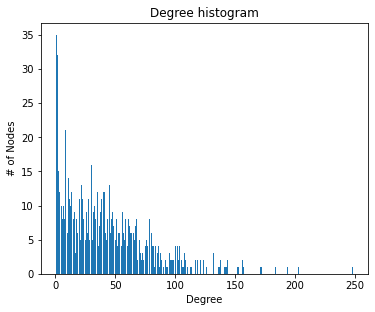

In [ ]:
deg_graph(Caltech)

###MIT

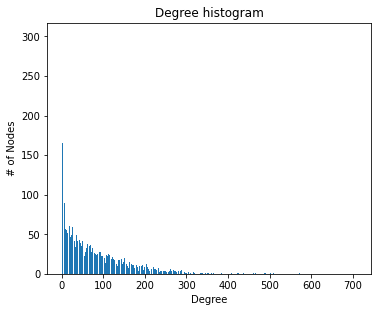

In [ ]:
deg_graph(MIT)

###Johns Hopkins

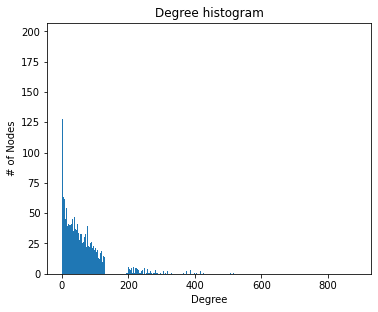

In [ ]:
deg_graph(JHopking)


###What are you able to conclude from these degree distributions?

We can observe through the graphs that there is a great variety of highly connected nodes but of a very low degree,, possibly they are new students who do not know anyone and therefore do not have as many connections.

##Clustering

###Global Clustering

The next lines computes graph transitivity, the fraction of all possible triangles present in the graph received as parameter.

In [ ]:
GCCaltech = nx.transitivity(Caltech)
GCMIT = nx.transitivity(MIT)
GCJHopking = nx.transitivity(JHopking)

print('Global clustering of Caltech: ', GCCaltech)
print('Global clustering of MIT: ', GCMIT)
print('Global clustering of John Hopkins: ', GCJHopking)

Global clustering of Caltech:  0.2912826901150874
Global clustering of MIT:  0.18028845093502427
Global clustering of John Hopkins:  0.19316123901594015


### Mean Local Clustering

The next lines computes  the average clustering coefficient for the graph received as parameter.

In [ ]:
MLCCaltech = nx.average_clustering(Caltech)
MLCMIT = nx.average_clustering(MIT)
MLCJHopking = nx.average_clustering(JHopking)

print('Mean local clustering of Caltech: ', MLCCaltech)
print('Mean local clustering of MIT: ', MLCMIT)
print('Mean local clustering of John Hopkins: ', MLCJHopking)

Mean local clustering of Caltech:  0.40929439048517247
Mean local clustering of MIT:  0.2712187419501315
Mean local clustering of John Hopkins:  0.26839307371293525


### Edge Density

The next lines computes  the density for the graph received as parameter.

In [ ]:
EDCaltech = nx.density(Caltech)
EDMIT = nx.density(MIT)
EDJHopking = nx.density(JHopking)

print('Edge Density of Caltech: ', EDCaltech)
print('Edge Density of MIT: ', EDMIT)
print('Edge Density of John Hopkins: ', EDJHopking)

Edge Density of Caltech:  0.05640442132639792
Edge Density of MIT:  0.012118119495041378
Edge Density of John Hopkins:  0.013910200162372396


###Should either of these networks be construed as sparse?

They can be considered as sparse just by observing the previous results in the clustering part since they all have very low values , this agrees with the first part, in which we observed that the degree of most nodes was very low. What affirms the little interconnection between nodes.

##Scatter Plot

###Degree Graphic

The following function return a list of the degree of all the nodes. It receives as parameters a graph that belongs to the Facebook 100 Dataset.

In [ ]:
def plt_degree(G):
  return [val for (node, val) in G.degree]

###Clustering

The following function return a list of clustering coefficient all the nodes. It receives as parameters a graph that belongs to the Facebook 100 Dataset.

In [ ]:
def plt_clustering(G):
  return list(nx.clustering(G).values())

###Caltech

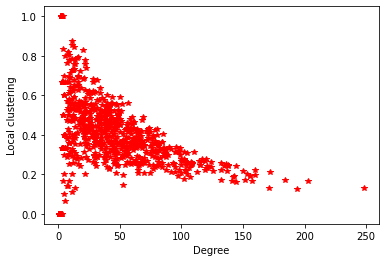

In [ ]:
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(plt_degree(Caltech), plt_clustering(Caltech),"*", color='red');

###MIT

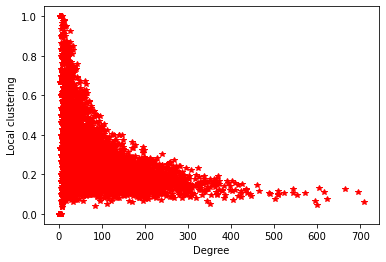

In [ ]:
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(plt_degree(MIT), plt_clustering(MIT),'*', color='red');

###John Hopkins

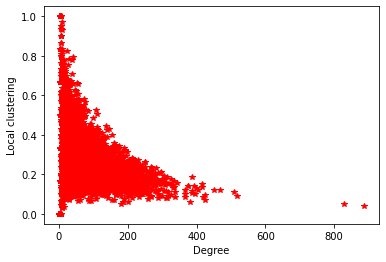

In [ ]:
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(plt_degree(JHopking), plt_clustering(JHopking),'*', color='red');

###Based on these calculations as well as your previous ones, are you able to draw any conclusions about any similarities or dierences between the tree networks?

The first thing that can be easily observed is that the large number of nodes interconnected to small degrees can be seen in the 3 graphs, reaffirming the results in the first part. Of the 3 graphs, the one for MIT and John Hopkins are practically the same as they have an exponential behavior, unlike Caltech, which has more accumulation of nodes but in the central part of the clustering

# Question 3: Social Network Analysis with the Facebook100 Dataset

We import the Facebook 100 dataset files from our Google Drive.





In [ ]:
files = os.listdir('/content/drive/MyDrive/GR/fb100/')
nf = len(files)

By resource topic, we selected 20 files that belong to the Facebook 100 Dataset.


In [ ]:
Graphs = []
for _ in range(20):
 Graphs.append(None)
cont = 0
for _ in range (20):
  ruta = '/content/drive/MyDrive/GR/fb100/' + files[cont]
  Graphs[cont] = nx.read_graphml(ruta)
  cont += 1

##Assortativity Graphic

The following function plots assertiveness as a function of network size. It receives as parameters an attribute and the number of networks that belong to the Facebook 100 Dataset.

In [ ]:
def assortativity_graphic(att, num_net):
  attribute = []
  size = []
  for _ in range(num_net):
    attribute.append(None)
    size.append(None)
  cont = 0
  title = att.title() + " Assortativity"
  for x in range(num_net):
    attribute[cont] = nx.attribute_assortativity_coefficient(Graphs[cont], att)
    size[cont] = Graphs[cont].size()
    cont += 1
  plt.xlabel(r"Network Size ")
  plt.ylabel(title)
  plt.xscale('log')
  plt.grid(axis='y', alpha=0.50)
  plt.grid(axis='x', alpha=0.50)
  plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
  plt.plot(size, attribute, '*', color='blue');

##Assortativity Degree Graphic

The following function plots assertiveness as a function of network size. It receives as parameter the number of networks that belong to the Facebook 100 Dataset.

In [ ]:
def assortativity_degree_graphic(num_net):
  attribute = []
  size = []
  for _ in range(num_net):
    attribute.append(None)
    size.append(None)
  cont = 0
  title ="Degree Assortativity"
  for x in range(num_net):
    attribute[cont] = nx.degree_assortativity_coefficient(Graphs[cont])
    size[cont] = Graphs[cont].size()
    cont += 1
  plt.xlabel(r"Network Size ")
  plt.ylabel(title)
  plt.xscale('log')
  plt.grid(axis='y', alpha=0.50)
  plt.grid(axis='x', alpha=0.50)
  plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
  plt.plot(size, attribute, '*', color='blue');

##Density Graphic

The following function plots assertiveness distribution. In this method, a continuous curve is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. It receives as parameters an attribute and the number of networks that belong to the Facebook 100 Dataset.

In [ ]:
import seaborn as sns
def density_graphic(att,num_net):
  attribute = []
  for _ in range(num_net):
    attribute.append(None)
  cont = 0
  title = att.title() + " Assortativity"
  for x in range(num_net):
    attribute[cont] = nx.attribute_assortativity_coefficient(Graphs[cont], att)
    cont += 1
  sns.distplot(attribute, hist=False, kde=True, 
             bins=int(180/5), color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
  plt.xlabel(title)
  plt.grid(axis='y', alpha=0.50)
  plt.grid(axis='x', alpha=0.50)
  plt.xlim(left=-0.01)
  plt.axvline(0, color='red', linestyle='dashed', linewidth=1)

##Density Degree Graphic

The following function plots assertiveness distribution. In this method, a continuous curve is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. It receives as parameter the number of networks that belong to the Facebook 100 Dataset.

In [ ]:
import seaborn as sns
def density_degree_graphic(num_net):
  attribute = []
  for _ in range(num_net):
    attribute.append(None)
  cont = 0
  title ="Degree Assortativity"
  for x in range(num_net):
    attribute[cont] = nx.degree_assortativity_coefficient(Graphs[cont])
    cont += 1
  sns.distplot(attribute, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
  plt.xlabel(title)
  plt.grid(axis='y', alpha=0.50)
  plt.grid(axis='x', alpha=0.50)
  plt.xlim(left=-0.01)
  plt.axvline(0, color='black', linestyle='dashed', linewidth=1)

###Dorm

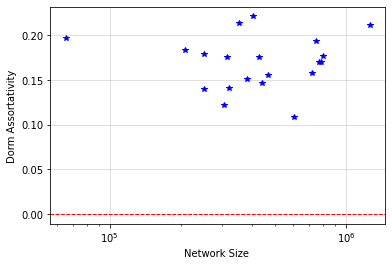

In [ ]:
assortativity_graphic("dorm",20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


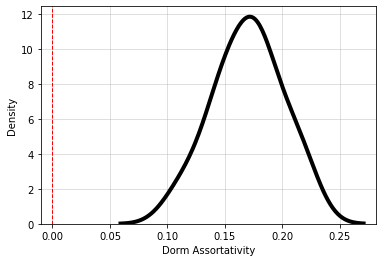

In [ ]:
density_graphic("dorm",20)

###Major

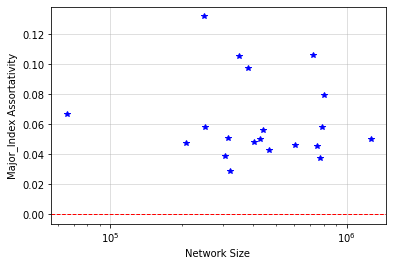

In [ ]:
assortativity_graphic("major_index",20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


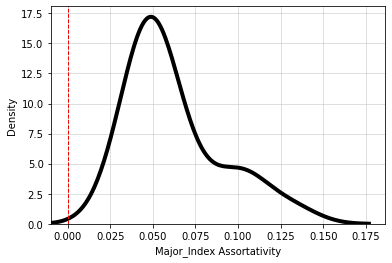

In [ ]:
density_graphic("major_index",20)

###Student/Faculty Status

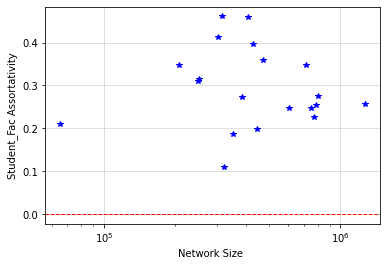

In [ ]:
assortativity_graphic("student_fac",20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


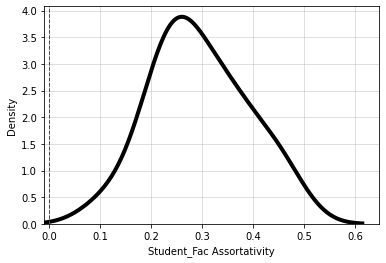

In [ ]:
density_graphic("student_fac",20)

###Degree

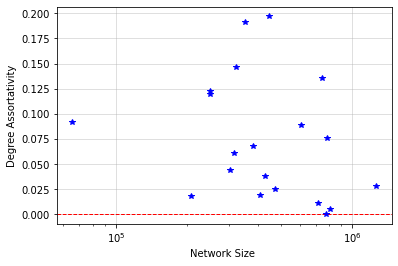

In [ ]:
assortativity_degree_graphic(20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


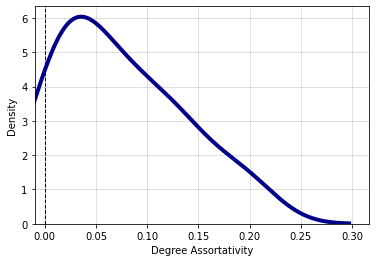

In [ ]:
density_degree_graphic(20)

###Analysis

In [ ]:
print(nx.attribute_assortativity_coefficient(Graphs[0], "dorm"))
print(nx.attribute_assortativity_coefficient(Graphs[0], "student_fac"))
print(nx.attribute_assortativity_coefficient(Graphs[0], "major_index"))
print(nx.degree_assortativity_coefficient(Graphs[0]))
print(Graphs[0].size())

0.17631148494206905
0.46085880060278733
0.05069448097957243
0.06126868807106425
314989


According to the results obtained in the graphs, it can be deduced that there is a greater number of connected nodes or connected students among students who study in the same faculty because possibly here they have a much more direct interaction since multiple activities can be carried out, instead with people. who share a bedroom according to the time of each person can only get to greet each other during the day, but that is not living together.


#Question 4: Link prediction

###Implement the following link prediction metrics: common neighbors, jaccard, Adamic/Adar.


In [3]:
from random import randint
import random

This function selects the percentage that will be used to calculate E_removed.

In [4]:
def random_percentaje():
  per = 0
  test = randint(1,4)
  if test == 1:
    per = 0.05
  elif test == 2:
    per = 0.1
  elif test == 3:
    per = 0.15
  elif test == 4:
    per = 0.2
  return per

This function returns the Graph (e_removed) and the subset of links that were removed from the original Graph. It receives as parameters a graph and a percentage.

In [5]:
def remove_edges(G,per):
  n = G.number_of_edges()
  e_removed = G 
  e_subset = random.sample(G.edges(), int(per*n))
  e_removed.remove_edges_from(e_subset)
  edge_subset_size = len(list(e_subset))
  print("Deleted : ", str(edge_subset_size))
  print("Remaining : ", str((n - edge_subset_size)))
  return e_removed, e_subset

 This function converts a list with triples (u,v,p) to a list with pairs (u,v).

In [6]:
def forIntersection(lista):
  ret = []
  i = 0
  for _ in range(len(lista)):
    ret.append(None)
  for u, v, p in lista: 
      ret[i] = u,v
      i = i + 1
  return ret 

This function returns the intersection between the elements of two lists.

In [7]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

This function returns the unique combinations of nodes (u,v) within a graph. It receives the graph as a parameter and returns a list with the combinations described above.

In [8]:
def unique(G):
  lis = []
  n = len(G.nodes)
  i = 0
  j = 0 
  for _ in range(len(G.nodes)-1):
    for _ in range(len(G.nodes)-1):
      terna = str(i),str(j)
      lis.append(terna)
      j = j + 1
    j = 0 
    i = i + 1
  ret = list(tuple(sorted(x)) for x in lis)
  return ret

common_neighbor_cen(G): This function returns a list to which Common Neighbors have been applied for link prediction.

In [9]:
def common_neighbor_cen(G):
  unicos = unique(G)
  cn_list = []
  n = len(unicos)
  cont1 = 0
  for _ in range(n-1):
    dupla = unicos[cont1]
    cn = sorted(nx.common_neighbors(G, dupla[0], dupla[1]))
    terna = dupla[0],dupla[1],len(cn)
    cn_list.append(terna) 
    cont1 = cont1 + 1
  return cn_list

This function returns a list where Jaccard was applied for link prediction.

In [10]:
def jaccard_coeff(G):
  jc_list = list(nx.jaccard_coefficient(G))
  return jc_list

This function returns a list where Adamic/Adar was applied for link prediction.

In [11]:
def adamic_adar(G):
  aa_list = list(nx.adamic_adar_index(G))
  return aa_list

This function returns the third element of an associated parameter. It is used to filter down the metric values for link prediction.

In [12]:
def takeThird(elem):
    return elem[2]

### (c) Evaluating a link predictor:

1. Select graph Gfb(V, E) in the Facebook100 dataset.

In [13]:
randG = nx.read_graphml('/content/drive/MyDrive/GR/fb100/Caltech36.graphml')

2. Randomly remove a given fraction f ∈ [0.05, 0.1, 0.15, 0.2] of edges Eremoved
from the original graph Gfb.


In [14]:
testG,subset_testG = remove_edges(randG,random_percentaje())

Deleted :  2498
Remaining :  14158


3. For each node pair in the graph |V |×|V |, for each node pair compute the link
predictor metrics of interest p, these are the predicted ”friendship” Epredict.


In [15]:
A = jaccard_coeff(testG)
B = adamic_adar(testG)
C = common_neighbor_cen(testG)

4. Sort in decreasing order of confidence as a function p from the node pair
Epredict and then we take the first n pairs of nodes E
(n)
predict.


In [16]:
A.sort(key=takeThird,reverse=True) 

In [17]:
B.sort(key=takeThird,reverse=True) 

In [18]:
C.sort(key=takeThird,reverse=True)

In [19]:
e_predict_jc = forIntersection(A)
e_predict_aa = forIntersection(B)
e_predict_cn = forIntersection(C)

In [74]:
n = randint(1,testG.number_of_edges())
print(n)
e_predict_jc_n = e_predict_jc[0:n]
e_predict_aa_n = e_predict_aa[0:n]
e_predict_cn_n = e_predict_cn[0:n]

10783


5. Compute the size of the intersection between the edge set of removed edges
and the edge set of predicted node |Eremoved ∩ E(n)predict|.

In [76]:
e_removed_inter_e_predict_jc_n = intersection(subset_testG, e_predict_jc_n)
e_removed_inter_e_predict_aa_n = intersection(subset_testG, e_predict_aa_n)
e_removed_inter_e_predict_cn_n = intersection(subset_testG, e_predict_cn_n)

In [77]:
print("Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric:",len(e_removed_inter_e_predict_cn_n))
print("Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric:",len(e_removed_inter_e_predict_jc_n))
print("Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric:",len(e_removed_inter_e_predict_aa_n))

Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric: 545
Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric: 754
Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric: 753


###  (d) Choose a couple of graphs in the facebook100 dataset run and evaluate each link predictor on them, and conclude on the efficiency of the following metrics: Common Neighbors, Jaccard, Adamic/Adar.


In [23]:
G1 = nx.read_graphml("/content/drive/MyDrive/GR/fb100/Simmons81.graphml")
G2 = nx.read_graphml("/content/drive/MyDrive/GR/fb100/Reed98.graphml")

In [24]:
rG1,subset_rG1 = remove_edges(G1,random_percentaje())

Deleted :  3298
Remaining :  29690


In [25]:
rG2,subset_rG2 = remove_edges(G2,random_percentaje())

Deleted :  3762
Remaining :  15050


In [26]:
jc_G1 = jaccard_coeff(rG1)
aa_G1 = adamic_adar(rG1)
cn_G1 = common_neighbor_cen(rG1)

In [27]:
jc_G2 = jaccard_coeff(rG2)
aa_G2 = adamic_adar(rG2)
cn_G2 = common_neighbor_cen(rG2)

In [28]:
jc_G1.sort(key=takeThird,reverse=True) 

In [29]:
aa_G1.sort(key=takeThird,reverse=True) 

In [30]:
cn_G1.sort(key=takeThird,reverse=True) 

In [31]:
jc_G2.sort(key=takeThird,reverse=True) 

In [32]:
aa_G2.sort(key=takeThird,reverse=True) 

In [33]:
cn_G2.sort(key=takeThird,reverse=True) 

In [34]:
e_predict_jc_G1 = forIntersection(jc_G1)
e_predict_aa_G1 = forIntersection(aa_G1)
e_predict_cn_G1 = forIntersection(cn_G1)

In [35]:
e_predict_jc_G2 = forIntersection(jc_G2)
e_predict_aa_G2 = forIntersection(aa_G2)
e_predict_cn_G2 = forIntersection(cn_G2)

In [46]:
n1 = randint(1,rG1.number_of_edges())
print(n1)
e_predict_jc_n_G1 = e_predict_jc_G1[0:n]
e_predict_aa_n_G1 = e_predict_aa_G1[0:n]
e_predict_cn_n_G1 = e_predict_cn_G1[0:n]

15929


In [60]:
n2 = randint(1,rG2.number_of_edges())
print(n2)
e_predict_jc_n_G2 = e_predict_jc_G2[0:n]
e_predict_aa_n_G2 = e_predict_aa_G2[0:n]
e_predict_cn_n_G2 = e_predict_cn_G2[0:n]

12385


In [78]:
e_removed_inter_e_predict_jc_n_G1 = intersection(subset_rG1, e_predict_jc_n_G1)
e_removed_inter_e_predict_aa_n_G1 = intersection(subset_rG1, e_predict_aa_n_G1)
e_removed_inter_e_predict_cn_n_G1 = intersection(subset_rG1, e_predict_cn_n_G1)

In [79]:
e_removed_inter_e_predict_jc_n_G2 = intersection(subset_rG2, e_predict_jc_n_G2)
e_removed_inter_e_predict_aa_n_G2 = intersection(subset_rG2, e_predict_aa_n_G2)
e_removed_inter_e_predict_cn_n_G2 = intersection(subset_rG2, e_predict_cn_n_G2)

In [80]:
print("Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric in G1:",len(e_removed_inter_e_predict_cn_n_G1))
print("Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric in G1:",len(e_removed_inter_e_predict_jc_n_G1))
print("Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric in G1:",len(e_removed_inter_e_predict_aa_n_G1))

Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric in G1: 103
Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric in G1: 237
Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric in G1: 366


In [81]:
print("Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric in G2:",len(e_removed_inter_e_predict_cn_n_G2))
print("Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric in G2:",len(e_removed_inter_e_predict_jc_n_G2))
print("Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric in G2:",len(e_removed_inter_e_predict_aa_n_G2))

Intersection between edge set of removed edges and the edge set of predicted node using Common Neighbors Metric in G2: 343
Intersection between edge set of removed edges and the edge set of predicted node using Jaccard Metric in G2: 527
Intersection between edge set of removed edges and the edge set of predicted node using Adamic/Adar Metric in G2: 506


### Analysis

The results that we are observing are the number of nodes that each of the methods implemented within the nodes that we initially eliminated could predict, there are multiple factors that can alter this score, one of them is the number of nodes, since if we have a lower number of nodes the Common Neighbors method will be more adjusted to our needs since not having so many links is very likely to have a large number of neighbors, on the other hand by having a large number of nodes the Adamic/Adar method fits better to this need and to the interrelationships that exist between the nodes create new connections between the nodes.

#Question 5: Find missing labels with the label propagation algorithms

##Label Propagation Algorithm

We import the necessary libraries

In [ ]:
import math
from random import seed
from random import random

The following function normalize the Graph received as parameter

In [ ]:
def normalize(G):
    arrayNetwork = nx.to_numpy_array(G)
    sumNetwork = np.sum(arrayNetwork, axis=1)
    diagNetwork = np.diag(1./sumNetwork)
    return diagNetwork @ arrayNetwork

The following functions are the implementation of the label propagation algorithm

In [ ]:
def label_propagation(G, lbp, labels_id, tol=1e-3, max_iter=1000):
    norm = normalize(G)
    copy_ylabel = lbp.copy()
    previous = np.zeros(lbp.shape)

    for _ in range(max_iter):
        var = np.abs(np.sum(previous - lbp))
        
        if var < tol:
            break
        previous = lbp.copy()
        lbp = np.dot(norm, previous)
        lbp[labels_id] = copy_ylabel[labels_id]
        
    return lbp

In [ ]:
def complete_propagation(G, label, percentage):
  N = len(G)

  ndvalues = nx.get_node_attributes(G, label)
  ulist = list(set( valor for i in ndvalues for valor in ndvalues.values()))
  nunique = len(list(ulist))
  
  per = math.ceil(N*percentage)
  lp = np.zeros((N, nunique))
  lpbk = np.zeros((N, nunique))
  
  aprox_vals = []
  index = per * math.floor(random() * 1/percentage)
  cpindex = index
  total = index + per
  cnt = 0

  for i in ndvalues:
    for j in range(nunique):
      if ndvalues[i] == ulist[j] and ndvalues[i] != 0 and index < total and index <= cnt:
          lp[int(i), j] = 0
          lpbk[int(i), j] = 1
          aprox_vals.append(cnt)
          index = index + 1
      elif ndvalues[i] == ulist[j] and ndvalues[i] != 0:
        lp[int(i), j] = 1
        lpbk[int(i), j] = 1
    cnt = cnt + 1

  lid = (lp.sum(axis=1) == 1)
  lpf = label_propagation(G, lp, lid)

  return lpf, lpbk, cpindex, per

##Choose a network from The Facebook100 dataset and randomly select 10%, 20%, and 30% of of the node attributes of the network to be removed.

We load the Duke dataset to be able to compare the final results with the table provided in the PDF of the project 

In [ ]:
G5 = nx.read_graphml("/content/drive/MyDrive/GR/fb100/Duke14.graphml")

We assign the predicted matrix, the copy of the label, the initial value and the percentage, of each attribute to our local variables

###10%

>Dorm

In [ ]:
d1lp, d1lpbk, d1index, d1percentage = complete_propagation(G5, 'dorm', 0.1)

>Major

In [ ]:
m1lp, m1lpbk, m1index, m1percentage = complete_propagation(G5, 'major_index', 0.1)

>Gender

In [ ]:
g1lp, g1lpbk, g1index, g1percentage = complete_propagation(G5, 'gender', 0.1)

###20%

>Dorm

In [ ]:
d2lp, d2lpbk, d2index, d2percentage = complete_propagation(G5, 'dorm', 0.2)

>Major

In [ ]:
m2lp, m2lpbk, m2index, m2percentage = complete_propagation(G5, 'major_index', 0.2)

>Gender

In [ ]:
g2lp, g2lpbk, g2index, g2percentage = complete_propagation(G5, 'gender', 0.2)

###30%

>Dorm

In [ ]:
d3lp, d3lpbk, d3index, d3percentage = complete_propagation(G5, 'dorm', 0.3)

>Major

In [ ]:
m3lp, m3lpbk, m3index, m3percentage = complete_propagation(G5, 'major_index', 0.3)

>Gender

In [ ]:
g3lp, g3lpbk, g3index, g3percentage = complete_propagation(G5, 'gender', 0.3)

##Mean absolute error and Accuracy score

The following function get the acurracy, receives as parameter the predicted matrix, the copy of the label, the initial value and the percentage

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
def get_accuracy(label_predict, label_backup, index, per):
  labels_id = (label_backup.sum(axis=1) == 1)
  prom = 0
  count = index
  tot = 0

  while (count < (per + index)):
    if (labels_id[count]):
      tot = tot + 1
      acc = 0
      greater_val = 0
      for value in label_backup[count]:
        if value != 0:
          break;
        acc = acc + 1
      for value in label_predict[count]:
        if value > greater_val:
          greater_val = value
      if (label_predict[count][acc] >= (1 /(len(label_predict[count]) -1)) and label_predict[count][acc] >= greater_val):
        prom = prom + 1
    count = count + 1
  return prom/tot

We get the accuracy of each attribute according to its percentage

###10%

>Dorm

In [ ]:
d1accuracy = get_accuracy(d1lp, d1lpbk, d1index, d1percentage)
print("Accuracy : ", d1accuracy)

# Mean Absolute Error
labels_id = (d1lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(d1lpbk[labels_id], d1lp[labels_id])

Accuracy :  0.5561959654178674
Mean Absolute Error: 


0.0016669283103000407

>Major

In [ ]:
m1accuracy = get_accuracy(m1lp, m1lpbk, m1index, m1percentage)
print("Accuracy : ", m1accuracy)

# Mean Absolute Error
labels_id = (m1lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(m1lpbk[labels_id], m1lp[labels_id])

Accuracy :  0.2892670157068063
Mean Absolute Error: 


0.0032475838896609925

>Gender

In [ ]:
g1accuracy = get_accuracy(g1lp, g1lpbk, g1index, g1percentage)
print("Accuracy : ", g1accuracy)

# Mean Absolute Error
labels_id = (g1lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(g1lpbk[labels_id], g1lp[labels_id])

Accuracy :  0.6758241758241759
Mean Absolute Error: 


0.03286705824333081

###20%

>Dorm

In [ ]:
d2accuracy = get_accuracy(d2lp, d2lpbk, d2index, d2percentage)
print("Accuracy : ", d2accuracy)

labels_id = (d2lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(d2lpbk[labels_id], d2lp[labels_id])

Accuracy :  0.5108695652173914
Mean Absolute Error: 


0.00343400582309567

>Major

In [ ]:
m2accuracy = get_accuracy(m2lp, m2lpbk, m2index, m2percentage)
print("Accuracy : ", m2accuracy)

labels_id = (m2lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(m2lpbk[labels_id], m2lp[labels_id])

Accuracy :  0.25574177529484793
Mean Absolute Error: 


0.006590525037691797

>Gender

In [ ]:
g2accuracy = get_accuracy(g2lp, g2lpbk, g2index, g2percentage)
print("Accuracy : ", g2accuracy)

labels_id = (g2lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(g2lpbk[labels_id], g2lp[labels_id])

Accuracy :  0.6782369146005509
Mean Absolute Error: 


0.06595445393440955

###30%

>Dorm

In [ ]:
d3accuracy = get_accuracy(d3lp, d3lpbk, d3index, d3percentage)
print("Accuracy : ", d3accuracy)

labels_id = (d3lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(d3lpbk[labels_id], d3lp[labels_id])

Accuracy :  0.4787792083929423
Mean Absolute Error: 


0.004952369920742225

>Major

In [ ]:
m3accuracy = get_accuracy(m3lp, m3lpbk, m3index, m3percentage)
print("Accuracy : ", m3accuracy)

labels_id = (m3lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(m3lpbk[labels_id], m3lp[labels_id])

Accuracy :  0.25754356141096474
Mean Absolute Error: 


0.00991025139908595

>Gender

In [ ]:
g3accuracy = get_accuracy(g3lp, g3lpbk, g3index, g3percentage)
print("Accuracy : ", g3accuracy)

labels_id = (g3lpbk.sum(axis=1) == 1)
print('Mean Absolute Error: ')
mean_absolute_error(g3lpbk[labels_id], g3lp[labels_id])

Accuracy :  0.6773717238833518
Mean Absolute Error: 


0.09871172071968497

###Results

Here are the final results of the accuracy for the Duke dataset

In [ ]:
print("Fraction Removed\n")
print("10% of Fraction Removed")
print("Major: ", m1accuracy)
print("Dorm: ", d1accuracy)
print("Gender: ", g1accuracy,"\n")
print("20% of Fraction Removed")
print("Major: ", m2accuracy)
print("Dorm: ", d2accuracy)
print("Gender: ", g2accuracy,"\n")
print("30% of Fraction Removed")
print("Major: ", m3accuracy)
print("Dorm: ", d3accuracy)
print("Gender: ", g3accuracy,"\n")

Fraction Removed

10% of Fraction Removed
Major:  0.2892670157068063
Dorm:  0.5561959654178674
Gender:  0.6758241758241759 

20% of Fraction Removed
Major:  0.25574177529484793
Dorm:  0.5108695652173914
Gender:  0.6782369146005509 

30% of Fraction Removed
Major:  0.25754356141096474
Dorm:  0.4787792083929423
Gender:  0.6773717238833518 



###Conclusion

With the label propagation algorithm we can realize that the labels affect the algorithm a lot, since as we could see in the gender attribute, the results were very good and efficient, since it only had to try to predict two genders, but to fourth and major attributes was a bit more complicated to predict as it had many more tags to use to predict. With the mean absolute error and the accuracy we can realize that while the algorithm has more information about the connections, the percentage of missing values ​​will decrease and the predictions will improve.